<a href="https://colab.research.google.com/github/Valerie-Osawe/Stutern/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Osaruonamen Olu-Osawe
<br>

## Please show and display ALL your calculations and results.


In [19]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```


<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [2]:
skin_review = pd.read_csv('Ulta Skincare Reviews.csv')
skin_review.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [3]:
skin_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [4]:
# check the row with missing values
missing_rows = skin_review.isnull().any(axis = 1)
skin_review[missing_rows]

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
3397,Half full product,"The only reason I'm rating this three stars is because it's already a travel-size item, do they really needs to only fill the bottle up halfway? For how pricey this travel size bottle is, they could at least fill the whole thing up or use a smaller container, because otherwise it seems misleading.",No,2 years ago,NaN,2,0,Daily Microfoliant,Dermalogica,3/27/23
3684,Received a sample and loved it!,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,3/27/23
3686,This product works,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,3/27/23


In [5]:
# Replace missing value in Review_Location with undisclosed
skin_review['Review_Location'] = skin_review['Review_Location'].fillna('Undisclosed')

# Replace the missing values in Review_Text with unknown
skin_review['Review_Text'] = skin_review['Review_Text'].fillna('Unknown')

In [6]:
# check for duplicate rows
skin_review.duplicated().sum()

456

In [7]:
# Drop duplicates
skin_review = skin_review.drop_duplicates(keep = 'first')

## What can the reviews tell us about the products?

In [9]:
skin_review.Product.unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

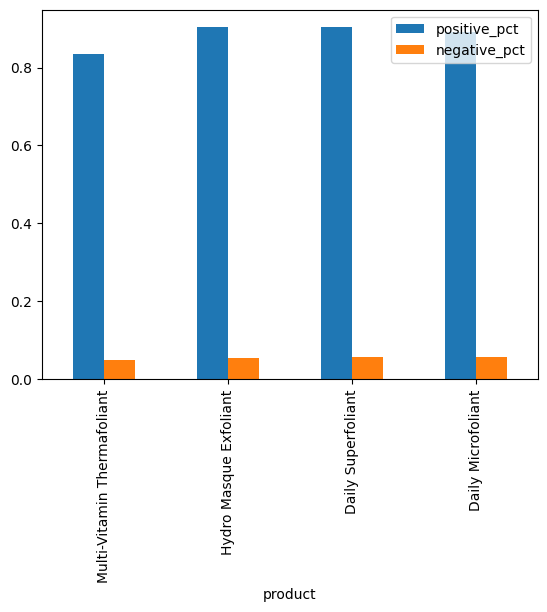

In [22]:
# Preprocess the data
stop_words = set(stopwords.words('english'))
skin_review['clean_review'] = skin_review['Review_Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words]))
# Group the data by product and analyze each product separately
products = skin_review['Product'].unique()
results = []
for product in products:
    product_df = skin_review[skin_review['Product'] == product]
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = product_df['clean_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
    positive_reviews = (sentiment_scores > 0).sum()
    negative_reviews = (sentiment_scores < 0).sum()
    neutral_reviews = (sentiment_scores == 0).sum()
    total_reviews = len(product_df)
    results.append({
        'product': product,
        'positive_reviews': positive_reviews,
        'negative_reviews': negative_reviews,
        'neutral_reviews': neutral_reviews,
        'total_reviews': total_reviews
    })

# Visualize the results
results_df = pd.DataFrame(results)
results_df['positive_pct'] = results_df['positive_reviews'] / results_df['total_reviews']
results_df['negative_pct'] = results_df['negative_reviews'] / results_df['total_reviews']
results_df.plot.bar(x='product', y=['positive_pct', 'negative_pct'], stacked=False)
plt.show()


From the bar plot above it can be seen that the reveiws of each products were majorly positive and so therefore the products are good

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.